1) Simple Linear Reg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2) dataset import


In [ ]:
# load the dataset from the CSV file
dataset = pd.read_csv('/content/data_linear_regression.csv')

# independent variable (feature). we use [:, :-1] to select all rows and all columns except the last one
X = dataset.iloc[:, :-1].values

# dependent variable (target) - we use [:, -1] to select all rows and only the last column
y = dataset.iloc[:, -1].values

In [ ]:
#3 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#4 train simple reg model

# create our Linear Regression object
regressor = LinearRegression()

# train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#5 predict

# make predictions on the test data
y_pred = regressor.predict(X_test)

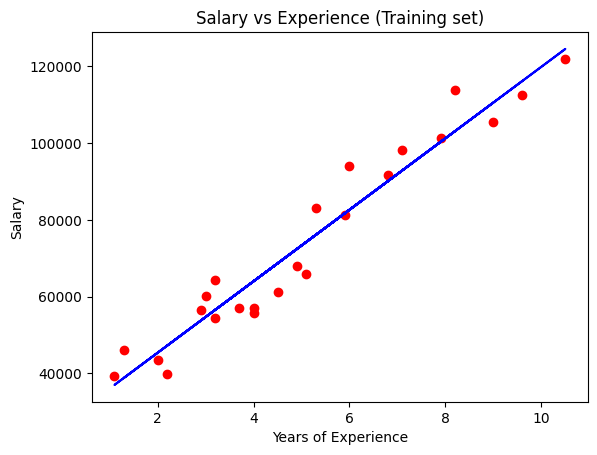

In [ ]:
# plot the actual data points (training set)
plt.scatter(X_train, y_train, color = 'red')

# plot the regression line (predictions for the training set)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# add titles and labels
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# sgiw the plot
plt.show()

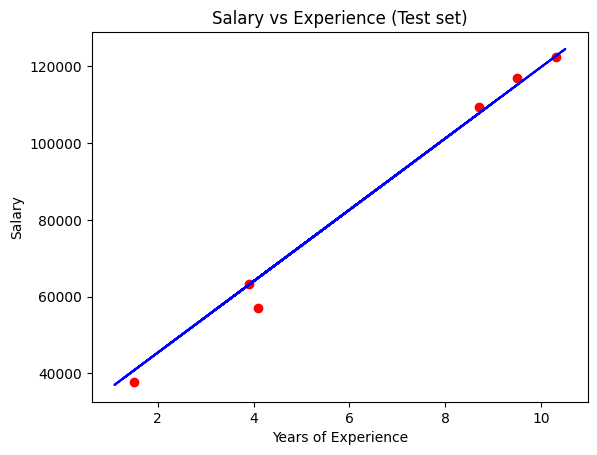

In [ ]:
# visualize test set results

# plot the actual data points (test set)
plt.scatter(X_test, y_test, color = 'red')

# plot the regression line (predictions are based on the model trained on the training set)
# the regression line will be the same as above
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# add titles and labels
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# show the plot
plt.show()

In [ ]:
# multiple regression time


# 1 lib imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
# dataset loading (2)

# load dataset
dataset = pd.read_csv('/content/data_multiple_regression.csv')

# IV, all columns but last
X = dataset.iloc[:, :-1].values

# DV
y = dataset.iloc[:, -1].values

In [ ]:
# encoding (3) create a ColumnTransformer to apply OneHotEncoder to the 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# Apply the transformation to X
X = np.array(ct.fit_transform(X))


In [ ]:
# dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#5. Train the Multiple Linear Regression Model
#create and train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#6 predict test results and startup to determine when people were wearing the steez.
# make predictions on the test set
y_pred = regressor.predict(X_test)

# display the predicted vs actual values for comparison
np.set_printoptions(precision=2) # a helper to make the output cleaner
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
# c: polynomial reg
# 1 library import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# importe dataset
# load  dataset
dataset = pd.read_csv('/content/data_polynomial_regression.csv')

# iv (feature)
X = dataset.iloc[:, 1:-1].values

# dv - salary
y = dataset.iloc[:, -1].values

In [ ]:
# create and train a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# create polynomial features (we'll try degree 4)
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

# create and train a new linear regression model on the polynomial features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

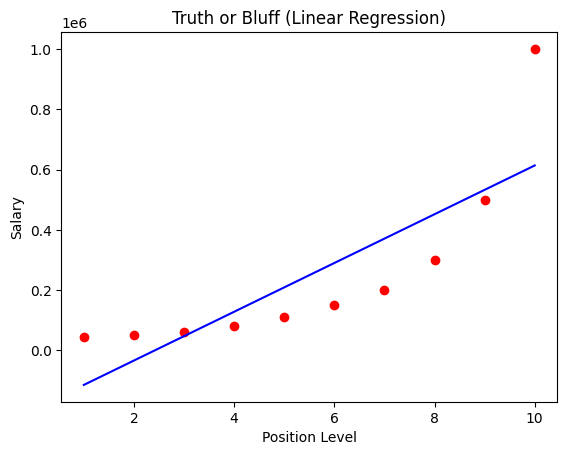

In [ ]:
# plot try
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

/tmp/ipython-input-3536753905.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


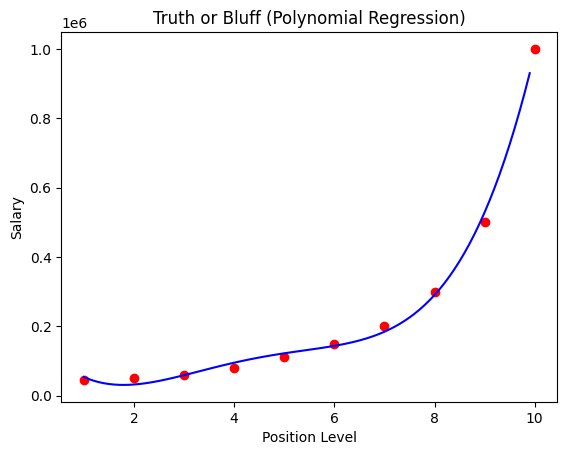

In [ ]:
# create a smoother range of X values for a prettier curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# plot the original data points
plt.scatter(X, y, color = 'red')

# plot the polynomial regression curve
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# new predictions
# input must be a 2D array, so we use [[6.5]]
prediction_lin = lin_reg.predict([[6.5]])
print(f"Linear Regression Prediction for level 6.5: ${prediction_lin[0]:,.2f}")

Linear Regression Prediction for level 6.5: $330,378.79
